## A3a - Example outputs

This notebook provides example outputs and suggestions for the exercises in *A3a: Signals and Noise.*
It does not include the solution code.

In [1]:
# activate the environment for this assignment
using Pkg
Pkg.activate(".")

using Plots

  Activating project at `~/Dropbox/teaching/CP/CP-notebooks/A3-Signal Processing`


In [2]:
# Include the solution code for the exercises.
include("A3a-code.jl")

# We will also reuse some functions from A1b.
include("../A1-Jupyter Notebooks/A1b-code.jl")

envelope

### 1. Continuous signals and sampling

### 1a. Sampling

In [3]:
# set common defaults for plots
default(titlefontsize=12)

# also define common keyword arguments
plotkw = (tscale=10^3, tunits="msecs")

(tscale = 1000, tunits = "msecs")

Here are some example outputs of `plot_sampled_function`. Choose values that make it easy to check your implementation.

One of the learning objectives is learning to write functions that accept functions as arguments. There are two ways to approach this:

1. Pass in an [anonymous function](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions):

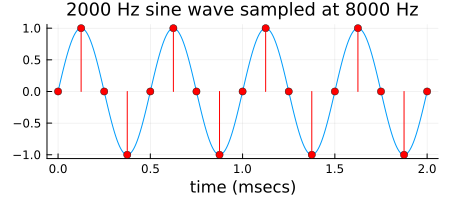

In [4]:
f=2000
fs=8_000
fig = plot_sampled_function(t -> sinewave(t; f=f); 
    fs=fs, tlim=(0,2), plotkw...)
title!("$f Hz sine wave sampled at $fs Hz")

2. Define a separate function and pass that as an argument.

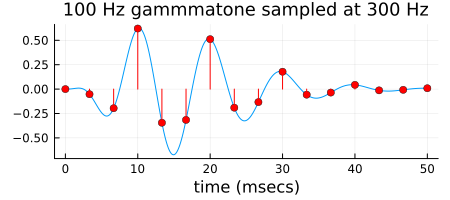

In [5]:
f = 100
fs = 300

# g(t) captures the variables f and fs.
g(t) = gammatone(t; f, fs) # Here, we supply fs to normalize the gammatone.

fig = plot_sampled_function(g; fs, tlim=(0,50), plotkw...)
title!("$f Hz gammmatone sampled at $fs Hz")

In this approach `g(t)` defines a [closure](https://en.wikipedia.org/wiki/Closure_(computer_programming)), which captures `f` and `fs` from the global scope of the notebook, so when we redefine them, the function changes accordingly.

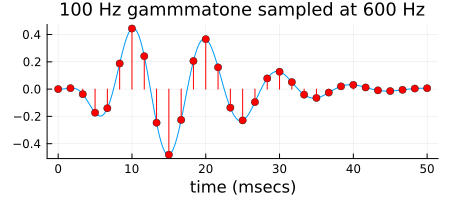

In [6]:
fs = 600
fig = plot_sampled_function(g; fs, tlim=(0,50), plotkw...)
title!("$f Hz gammmatone sampled at $fs Hz")

I would caution against using this approach, however. When the function `g` passed into `plot_sampled_function`, it's not apparent that the function depends on the values of `f` and `fs`. The reason `g` needs to be defined this way with option is because within `plot_sampled_function`, it can only assume that `g` is an arbitrary function of a single parameter (time). The other parameters are specific to the function `g` itself, and so needs to be defined outside before the function is passed in as an argument.

Note also that this approach opens up the possibility of unexpected results if the notebook cells are executed out of order.  With the anonymous function approach, nothing is added to the global scope, and the meaning of the function is clear.

### 1b. The Nyquist frequency and aliasing

In this exercise you need to explore different samplings of an underlying function. The example below shows an even sampling which is below the Nyquist frequency, but, in constrast, your plots should illustrate different samplings for each of the four listed condidtions.

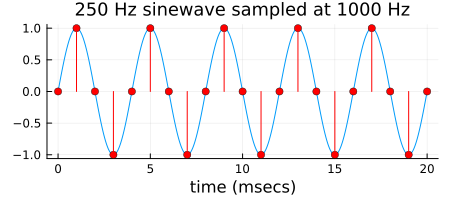

In [7]:
fs = 1000
f = 250
fig = plot_sampled_function(t -> sinewave(t; f);
    fs, tlim=(0,20), plotkw...)
title!("$f Hz sinewave sampled at $fs Hz")

The note after the four conditions emphasizes that you should not make the conceptual error of thinking that the samples are implicitly connected by lines as in a line plot, which could result in a very different looking function. The points are just samples of the underlying function at different points in time, which is why they're usually shown as a stem plot (unless the density of points would be too high).

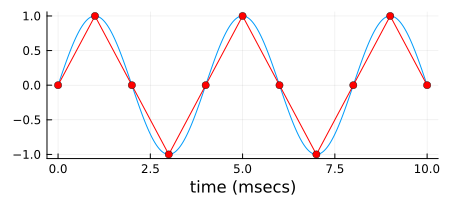

In [8]:
# a plot that (incorrectly) connects the samples with lines
fs = 1000
f = 250
plot_sampled_function(t -> sinewave(t; f); 
    fs, tlim=(0,10), line=:line, plotkw...)

## 2. Signals

### 2a. Delta and step functions

Your implementations should behave like normal functions, like for the plots below.

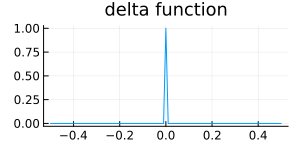

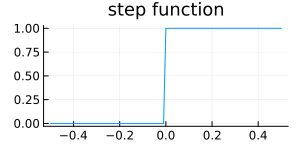

In [9]:
plotkw = (size=(300,150), legend=false)

fs = 100
t = -0.5 : 1/fs : 0.5
fig = plot(t, δ.(t; fs); plotkw...)
title!("delta function")
display(fig)

fig = plot(t, u.(t); plotkw...)
title!("step function")

### 2b. `gensignal`

Your functions should be defined correctly for different sampling frequencies.

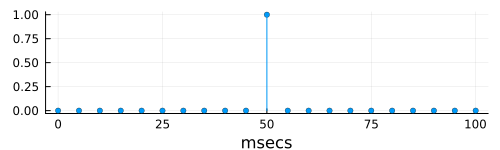

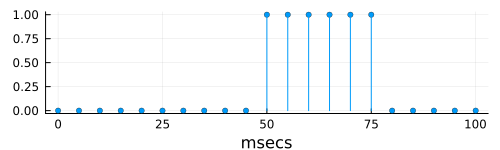

In [10]:
stemkw = (size=(500,150), legend=false, bottom_margin=10Plots.px,
    line=:stem, marker=:circle, markersize=3)

fs = 200
t = 0 : 1/fs : 0.100

s = gensignal.(t, t -> δ(t; fs); τ=0.050)
fig = plot(10^3*t, s; xlabel="msecs", stemkw...)
display(fig)

s = gensignal.(t, t -> u(t); τ=0.050, T=0.025)
fig = plot(10^3*t, s; xlabel="msecs", stemkw...)

The plot below illustrates the point in the last paragraph:

>Note that $T + \tau$ is an *exclusive* limit, because the sample times are centered on the sample periods.  For example, a unit step function for $f_s=1$, $\tau=0$, and $T=2$ will have values one only at times 0 and 1 with sample periods that extend from $-0.5/f_s$ to $1.5/f_s$.

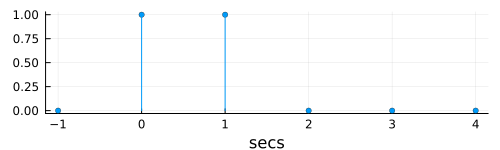

In [11]:
fs = 1
t = -1 : 1/fs : 4
s = gensignal.(t, t -> u(t); τ=0, T=2)
fig = plot(t, s; xlabel="secs", stemkw...)

## 3. Noise and SNR

### 3a. `energy`, `power`, and `snr`

Here we will illustrate the energy, power, and signal to noise functions on the gammatone function. The gammatone norm comes from assignment A1b, and the exact value depends on `fs` and  how the extent of the function is defined,but yours should be close to this. In particular, the value of `energy(y)` should be approximately 1.0, since that is the same mathematical expression as the norm. We also calculate the power between a specified time range and the SNR using a noise standard deviation of $\sigma_\epsilon = 0.01$.


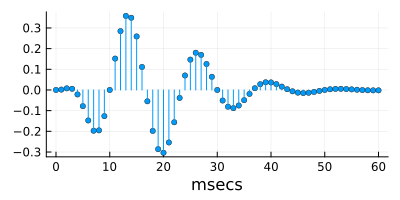

gammatone_norm(; f, fs) = 3.952554996649846e-7
energy(y) = 0.999995810988001
power(y) = 0.01639337395062297
power(y[0.01 .< t .< 0.03]) = 

0.044618976130905395
snr(power(y), 0.01 ^ 2) = 22.14668345720627


In [12]:
stemkw = (size=(400,200), legend=false, bottom_margin=10Plots.px,
    line=:stem, marker=:circle, markersize=3)

f = 75
fs = 1000

t = range(0, stop=0.06, step=1/fs)
y = gammatone.(t; f, fs)

@show gammatone_norm(; f, fs)

fig = plot(10^3*t, y; xlabel="msecs", stemkw...)
display(fig)

@show energy(y)
@show power(y)
@show power(y[0.010 .< t .< 0.030])
@show snr(power(y), 0.01^2);

### 3b. Noisy signals

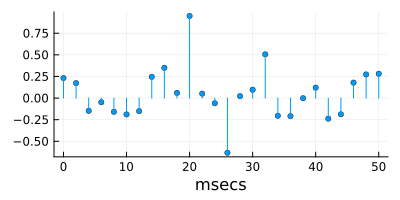

In [13]:
# A noisy delta function
fs = 500
t = 0 : 1/fs : 0.05
σ = 0.25
y = noisysignal.(t, t -> δ(t; fs); τ=0.020, σ)

fig = plot(10^3*t, y; xlabel="msecs", stemkw...)

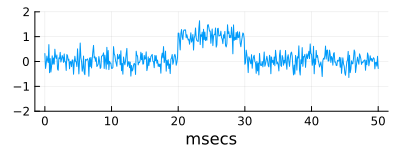

In [14]:
# noisy step function (using a line plot for clarity)
plotkw = (ylim=(-2,2), size=(400,150), legend=false, bottom_margin=10Plots.px)

fs = 10_000
t = 0 : 1/fs : 0.050
σ = 0.25

y = noisysignal.(t, t -> u(t); τ=0.020, T=0.010, σ)
fig = plot(10^3*t, y; xlabel="msecs", plotkw...)

### 3c. Noise for a specified SNR

Here we derive a noise level to produce a given SNR using `snr2sigma` on a sine wave for the whole extent. We can also check our calculations by evaluating the SNR from the powers of the signal and noise components. Note that the estimated SNR will vary around the specified value due to the random noise.

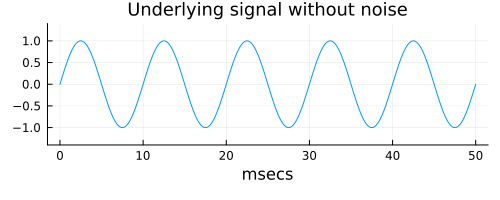

power(x) = 0.499001996007984


In [15]:
# Generate a signal
fs = 10_000
t = 0 : 1/fs : 0.050

x = sinewave.(t; f=100)

# set defaults for next few plots
plotkw = (ylim=(-1.4,1.4), size=(500,200), legend=false, bottom_margin=25Plots.px)

fig = plot(10^3*t, x; xlabel="msecs", plotkw...)
title!("Underlying signal without noise")
display(fig)
@show power(x);


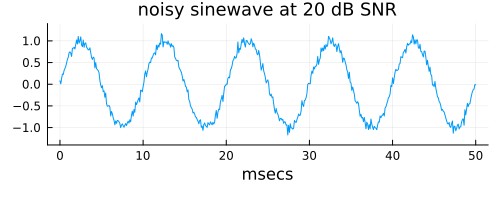

power(y .- x) = 0.0045756020750135785
snr(power(y), power(y .- x)) = 20.38085667983648


In [16]:
# signal with added noise
dBsnr = 20
σ = snr2sigma(; x=x, dBsnr=dBsnr)
y = addnoise(x; σ)

fig = plot(10^3*t, y; xlabel="msecs", plotkw...)
title!("noisy sinewave at $dBsnr dB SNR")
display(fig)

# calculate power of the noise and then the SNR
# (which should be approximately equal to the  true value)
@show power(y .- x)
@show snr(power(y), power(y .- x));

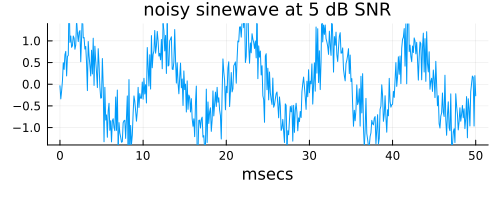

power(x) = 0.499001996007984
power(y .- x) = 0.15834708891441465
snr(power(y), power(y .- x)) = 6.113429889955557


In [17]:
dBsnr = 5
σ = snr2sigma(; x=x, dBsnr=dBsnr)
y = addnoise(x; σ)

fig = plot(10^3*t, y; xlabel="msecs", plotkw...)
title!("noisy sinewave at $dBsnr dB SNR")
display(fig)

# calculate power of the noise and then the SNR
# (which should be approximately equal to the  true value)
@show power(x)
@show power(y .- x)
@show snr(power(y), power(y .- x));

Now we do two examples, but restricting the range to a step function.

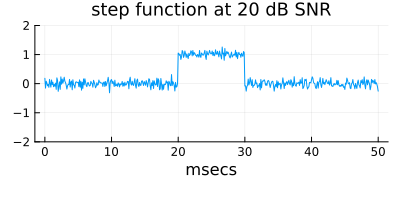

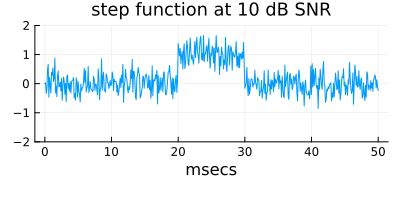

In [18]:
plotkw = (ylim=(-2,2), size=(400,200), legend=false, bottom_margin=25Plots.px)

fs = 10_000
t = 0 : 1/fs : 0.050
τ = 0.020
T = 0.010

x = gensignal.(t, t -> u(t); τ=τ, T=T)

# specify the location of the signal (the step) using a logical index
xrange = τ .< t .< τ + T

dBsnr = 20
σ = snr2sigma(; x=x, xrange=xrange, dBsnr=dBsnr)
y = addnoise(x; σ)

fig = plot(10^3*t, y; xlabel="msecs", plotkw...)
title!("step function at $dBsnr dB SNR")
display(fig)

dBsnr = 10
σ = snr2sigma(; x=x, xrange=xrange, dBsnr=dBsnr)
y = addnoise(x; σ)

fig = plot(10^3*t, y; xlabel="msecs", plotkw...)
title!("step function at $dBsnr dB SNR")
display(fig)

#### Calculating SNR over the signal extent

Note that when the extent of the signal is shorter in duration than the whole waveform, a power value calculated on the whole waveform won't correctly describe the power in the signal (which here is the step function).

In [19]:
# Power and SNR calculated on the whole wavefrom (incorrect)
@show power(x)
@show power(y .- x)
@show snr(power(y), power(y .- x));

power(x) = 0.1996007984031936
power(y .- x) = 

0.09932322795666186
snr(power(y), power(y .- x)) = 4.855812573502701


However, when we restrict the SNR calculation to the extent of the signal using it's range, we get the correct SNR (within variation).

In [20]:
# Power and SNR calculated ove the extent of step function (i.e. the signal)
@show power(x[xrange])
@show power(y[xrange] .- x[xrange])
@show snr(power(y[xrange]), power(y[xrange] .- x[xrange]));

power(x[xrange]) = 1.0
power(y[xrange] .- x[xrange]) = 0.09850049930705422
snr(power(y[xrange]), power(y[xrange] .- x[xrange])) = 10.5411481392756


### 3d. Estimating SNR

Here we illustrate how you might verify your `extent` function. Note that the extent threshold is specified as a fraction of the maximum absolute value.

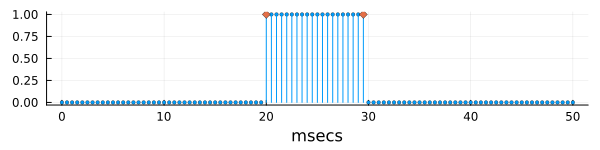

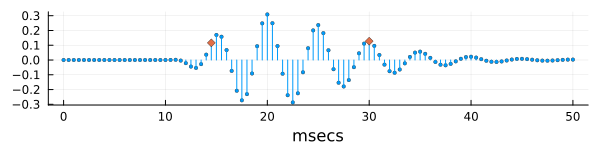

In [21]:
fs = 2000
t = 0 : 1/fs : 0.050

plotkw = (size=(600,150), legend=false, bottom_margin=20Plots.px)

stemkw = (size=(600,150), legend=false, bottom_margin=20Plots.px,
    line=:stem, marker=:circle, markersize=2)

dotkw = (marker=:diamond, markersize=4, line=:scatter)

x = gensignal.(t, t -> u(t); τ=0.020, T=0.010)
fig = plot(10^3*t, x; xlabel="msecs", stemkw...)
i = extent(x)
j = [first(i), last(i)]
fig = plot!(10^3*t[j], x[j]; dotkw...)
display(fig)

x = gensignal.(t, t -> gammatone(t; f=200, fs); τ=0.010, T=0.25)
fig = plot(10^3*t, x; xlabel="msecs", stemkw...)

# For easier checking, define the threshold in terms y units.
θ = 0.1 / maximum(abs.(x))
i = extent(x; θ=θ)
j = [i[1], i[end]]
plot!(10^3*t[j], x[j]; dotkw...)
display(fig)

The last part of the question asks you to show that this produces the correct range index and the correct estimated SNR for a known signal. Here we use the example above.

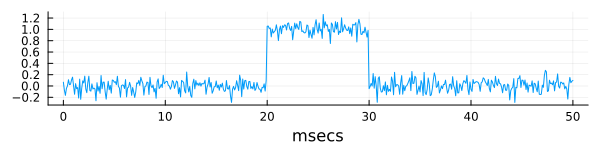

xrange = extent(y; θ = 0.5) = 201:300
snr(y; srange = xrange) = 19.937321255965067


In [22]:
fs = 10_000
t = 0 : 1/fs : 0.050
τ = 0.020
T = 0.010

x = gensignal.(t, t -> u(t); τ=τ, T=T)

# specify the location of the signal (the step) using a logical index
xrange = τ .< t .< τ + T

dBsnr = 20
σ = snr2sigma(; x=x, xrange=xrange, dBsnr=dBsnr)
y = addnoise(x; σ)

fig = plot(10^3*t, y; xlabel="msecs", plotkw...)
display(fig)

# set the threshold to half of maximum abs val
# (too close to the close can throw off xrange)
@show xrange = extent(y; θ=0.5)
@show snr(y; srange=xrange);

### 4. Grand synthesis

Here we use a function to synthesize a single gammatone in noise.

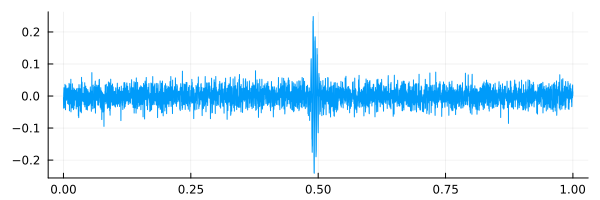

In [23]:
plotkw = (size=(600,200), legend=false)

# a simple test case
dBsnr = 10
y, t = synthesize_gammatones(; fs=4000, N=1, dur=1, dBsnr)
fig = plot(t, y; plotkw...)

If we write waveform to a sound file, we can play it to "see" if we can hear when the gammatone occurs for different SNRs.

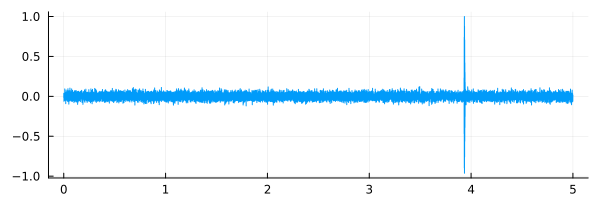

(times, freqs) = ([3.929785035007498], [677.278208464861])


In [25]:
using WAV

# a noisier test case
dBsnr = 20
y, t, times, freqs = synthesize_gammatones(; fs=4000, N=1, dur=5, dBsnr)

@show times, freqs

# normalize level to [-1, 1] (see note below)
A = maximum(abs.(y))
y /= A

fig = plot(t, y; plotkw...)
display(fig)

# Write out to a .wav file so we can try to hear the gammatone event.
wavwrite(y, "audio/gammatone-snr=$(dBsnr)dB.wav", Fs=fs)

#### Note on normalization

The .wav format supports floating point numbers in the sense that if you write on an unnormalized array of floats, you will get the same floats when you read them back in.  However, don't play unnormalize audio through your speakers!  We got a loud "pop" when playing 10 * randn() noise (but then heard the noise, so there might be some gain control to protect the speakers). However, we couldn't hear the sound when it was 0.01 * randn().  Here we just normalize audio between -1, and 1.